
## FINANCIAL ECONOMETRICS
MODULE 4 | LESSON 3

---

# **AUTOREGRESSIVE MODEL**

|  |  |
|:---|:---|
|**Reading Time** | 90  minutes |
|**Prior Knowledge** | Basic Time Series knowledge, White noise, Random walk  |
|**Keywords** | Autoregressive AR(p) process or model, Autoregressive operator, Mean, Variance, Autocovariance and Autocorrelations for AR(1), <br> Invertible MA, Method of Moments, First order moment, second order moment, Yule-Walker estimation, Maximum Likelihood estimation (MLE) |


---

*In the last lesson, we discussed white noise, random walk, and moving average (MA) time series models. In this lesson, we will continue to explore more time series models. Specifically, we will talk about the autoregressive model (AR model). We will go over the definition and properties of the AR model. We will also compare the autoregressive model with the moving average model. We will end the lesson with one application.*

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_process import arma_generate_sample

plt.rcParams["figure.figsize"] = (16, 9)  # Figure size and width

In [2]:
# Download the dataset
m4_data = pd.read_csv("M4. goog_eur_10.csv")
dxyr_data = pd.read_csv("M4. dxy_r_data.csv")

# Convert date variable to date format
m4_data["Date2"] = pd.to_datetime(m4_data["Date"], format="%m/%d/%Y")
dxyr_data["Date2"] = pd.to_datetime(dxyr_data["Date"], format="%m/%d/%Y")

# Selecting columns and setting index
goog = m4_data.loc[:, ["Date2", "GOOGLE"]].set_index("Date2")
ust10 = m4_data.loc[:, ["Date2", "UST10Y"]].set_index("Date2")
dxy = dxyr_data[["Date2", "DXY_R"]].set_index("Date2")

## **1. Ordinary Least Square Regression for Time Series Analysis**

From previous lessons, we know that often observations in a time series are correlated with each other. If we want to use the past observations to predict today's observations, the first thing that comes to mind is to use OLS (ordinary least square regression). In regular OLS, we have a dependent variable $Y$ and an independent variable $X$. We can write a linear regression as follows:

$$ Y = C+b_{1} X_{1} + \varepsilon $$ 

where $C$ is the intercept and $\varepsilon$ is the error term.

To apply OLS to a time series $X_t$ as a dependent variable, and its lag 1, $X_{t-1}$ as an independent variable, we can write the OLS as follows:

$$ X_{t} = C+b_{1}X_{t-1}+\varepsilon_{t} $$ 

where $C$ is the intercept and $\varepsilon_{t}$ is the normal white noise and absolute value of $b_{1} < 1$. 

We then can apply OLS to estimate the coefficients and the residuals and to conduct model diagnostics. The above regression model for time series $X_t$ is called an **autoregressive (AR) model**.


## **2. Autoregressive (AR) Model**

An autoregressive model is a regression model to predict a time series using a linear combination of its pass values as independent variables, like what we demonstrated in the last section for time series $X_t$. We set up a regression model to predict $X_t$ using its lag 1 variable $X_{t-1}$ as the independent variable. Because there is only one lag 1 variable on the right side of the equation, we also denote this autoregressive model as AR(1). 

We just described the concept of an autoregressive model. Now let's formally define an autoregressive model.


### **2.1 Definition of Autoregressive Model AR($p$)**

The formula for an autoregressive model with the order of $p$, denoted as AR($p$), is as follows:

$$ X_{t} = \alpha_{1} X_{t-1} + \alpha_{2} X_{t-2} + \cdots + \alpha_{p} X_{t-p} + W_{t} $$ 

Where $X_{t}$ is stationary, $\alpha_{1}, \alpha_{2}, \cdots, \alpha_{p}$ are constants and $W_{t}$ is normal white noise.  

If we use backshift operator $B$, we can rewrite AR($p$) as follows:

$$ \alpha(B) X_{t} = (1 - \alpha_{1} B - \alpha_{2} B^{2} - \cdots - \alpha_{p} B^{p}) X_{t} = W_{t} $$

$\alpha(B) = (1 - \alpha_{1} B - \alpha_{2} B^{2} - \cdots - \alpha_{p} B^{p})$ is defined as an autoregressive operator.

There are restrictions for the value of coefficients $\alpha$ to make sure $X_{t}$ can stay stationary.

> For AR(1), $-1 < \alpha_{1} < 1$.

>For AR(2), 
$ \begin{cases}
  -2 < \alpha_{1} < 2, \\
  -1 < \alpha_{2} < 1, \\
  \alpha_{1} + \alpha_{2} < 1, \\
  \alpha_{2} - \alpha_{1} < 1
\end{cases}$.

For a higher degree of AR, the requirement is as follows:

> 1. Set autoregressive operator = $0$ as follows: $ (1 - \alpha_{1} B - \alpha_{2} B^{2} - \cdots - \alpha_{p} B^{p}) = 0 $. This equation is called a characteristic equation.
2. Solve the characteristic equation for $B$ and get all the roots of $B$.
3. The absolute values of all the roots of $B$ need to be $> 1$ to ensure $X_{t}$ is stationary.

We will talk more about these requirements later in this course.

We can see from the AR definition above that random walk is very similar to AR(1) model except that $|\alpha_{1}|=1$. Hence, random walk is not stationary.
<span style='color: transparent; font-size:1%'>All rights reserved WQU WorldQuant University QQQQ</span>

### **2.2 Mean, Variance, ACF, and PACF for AR(1)**

AR(1) model can be written as follows:

$$ X_{t} = C + \alpha_{t} X_{t-1} + W_{t} $$

Where $C$ is a constant and $W_{t}$ is normal white noise with mean = $0$ and variance = $\sigma^{2}$

Now let's look at AR(1)'s mean, variance, autocovariance, ACF, and PACF.

The **mean** function is:

$$ \mu = \frac{C}{1-\alpha_{1}} $$

When there is no intercept $C$ in the process, $\mu$ is $0$.

The **variance** is:

$$ \frac{\sigma^{2}}{1-\alpha^{2}} $$

**Autocovariance** for $X_{t}$ and $ X_{s}$ is:

$$ \gamma(h) = \Big(\frac{\sigma^{2}}{1-\alpha^{2}} \Big) \alpha^{|h|}, \ \text{ where } |h| = |s – t| $$

**Autocorrelation** for $X_{t}$ and $ X_{s}$ is:

$$ \rho(h) =(\alpha^{|h|}), \ \text{ where } |h| = |s – t| $$

**Partial Autocorrelation** for $X_{t}$ and $ X_{s}$ is:

$$ \phi_{hh}= \begin{cases}
  \alpha  &  \text{ for } |h| \le 1 \\
  0  &  \text{ for } |h| > 1
\end{cases} $$


### **2.3 AR(1) and AR(2) Examples**

**Figure 1: AR(1) with $\alpha = 0.4$ and AR(1) with $\alpha = -0.4$**


[]

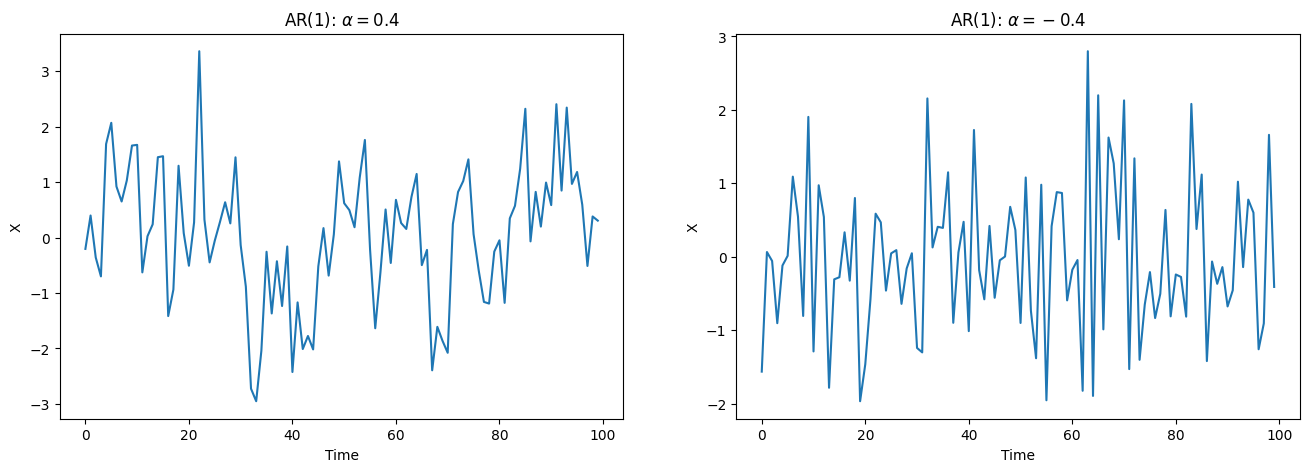

In [3]:
# Simulated AR(1) example with alpha=0.4 and AR(1) example with alpha=-0.4

# generate AR(1) models
np.random.seed(12345)
maparams = np.r_[1, np.array([0.0])]
arparams = np.r_[1, -np.array([0.4])]
arparams_neg = np.r_[1, -np.array([-0.4])]
ar1_p4 = arma_generate_sample(arparams, maparams, 100)  # AR(1): alpha=0.4
ar1_n4 = arma_generate_sample(arparams_neg, maparams, 100)  # AR(1): alpha=-0.4

# Plot
plt.figure(figsize=(16, 5))
ax1 = plt.subplot(121)
plt.plot(ar1_p4)
plt.title("AR(1): $\\alpha=0.4$")
plt.xlabel("Time")
plt.ylabel("X")

ax2 = plt.subplot(122)
ax2.plot(ar1_n4)
plt.title("AR(1): $\\alpha=-0.4$")
plt.xlabel("Time")
plt.ylabel("X")
plt.plot()

Figure 1 gives us two AR(1) graph examples. They both move around the mean = $0$ and within a horizontal band. The AR(1) with negative $\alpha$ is choppier than AR(1) with positive $\alpha$. We know the correlation of two observations next to each other is autocorrelation $\rho(1)$. For AR(1) model, $\rho(1)$ is $\alpha$. Hence, when $\alpha$ is positive, the two observations next to each other move in the same direction while when $\alpha$ is negative, the two observations next to each other move in the opposite direction. That is why we see the plot on the left is smoother than the plot on the right.


**Figure 2: ACF and PACF of AR(1)**

/usr/local/lib/python3.11/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


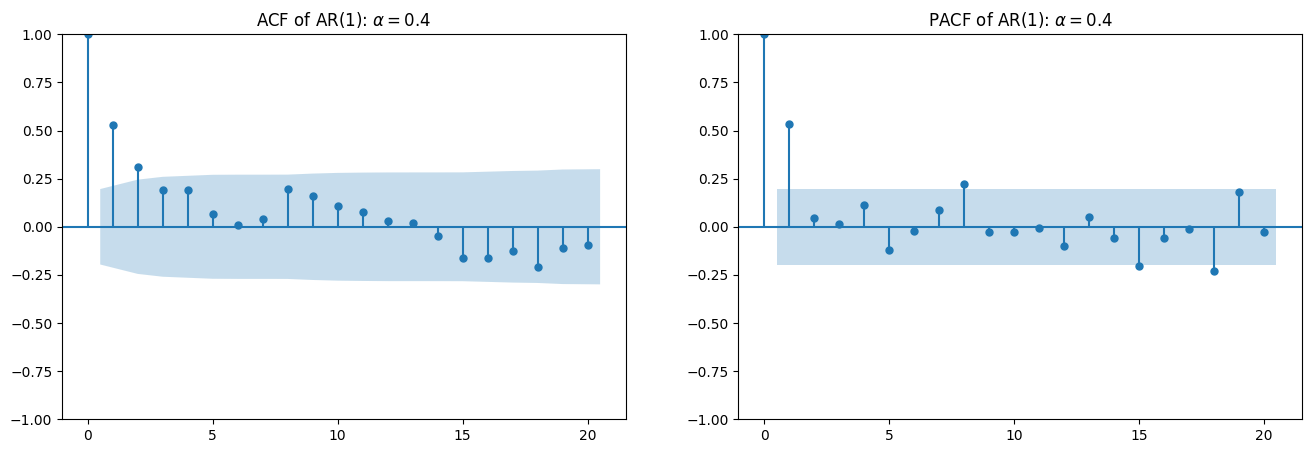

In [4]:
# ACF and PACF of AR(1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
sm.graphics.tsa.plot_acf(ar1_p4, title="ACF of AR(1): $\\alpha=0.4$", lags=20, ax=ax1)
sm.graphics.tsa.plot_pacf(ar1_p4, title="PACF of AR(1): $\\alpha=0.4$", lags=20, ax=ax2)
plt.show()

Figure 2 shows the ACF and PACF plots for AR(1) with $\alpha = 0.4$.  From both plots, we see ACF and PACF for lag 1 are all significant and their values are between 0.5 and 0.6. Since the example is simulated data from AR(1) with $\alpha = 0.4$, they are random sample data, and ACF and PACF usually are not exactly the same as 0.4. 

Now, let's try to simulate AR(2) and see its ACF and PACF plots. The following figure 3 shows the graphs for AR(2).


**Figure 3: ACF and PACF of AR(2)**


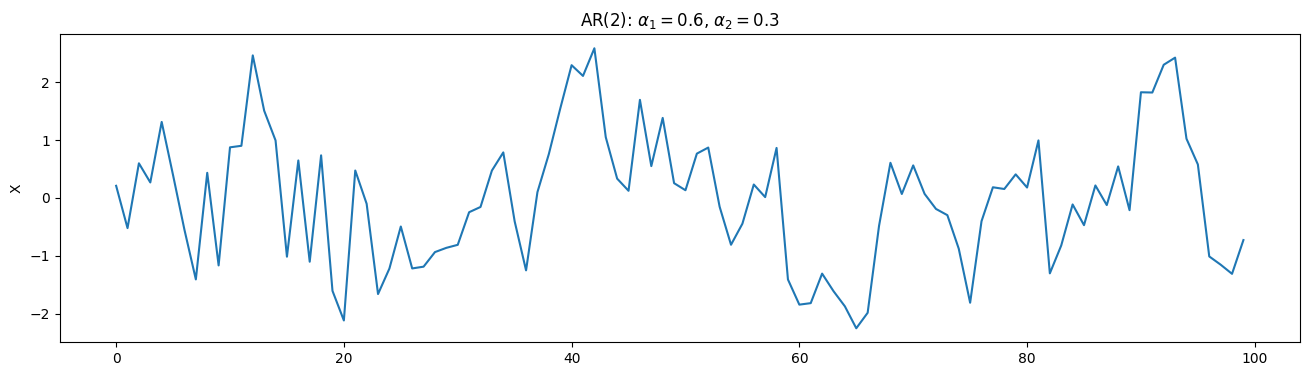

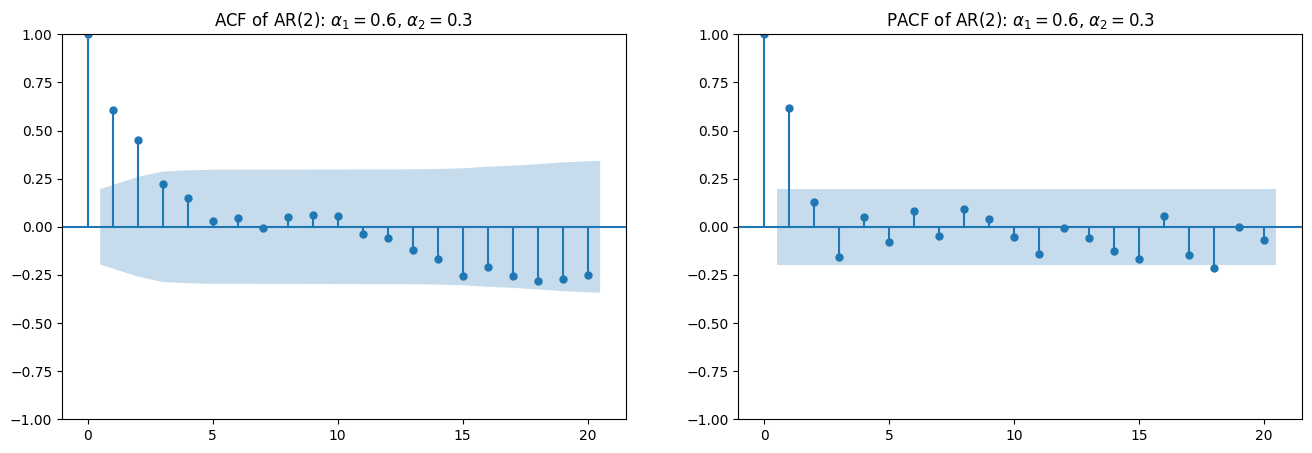

In [5]:
# ACF and PACF of AR(2)

np.random.seed(77777)
arparams1 = np.r_[1, -np.array([0.6, 0.3])]
maparams1 = np.r_[1, np.array([0.0, 0.0])]
ar2 = arma_generate_sample(arparams1, maparams1, 100)

# Plot AR(2)
plt.figure(figsize=(16, 4))
plt.plot(ar2)
plt.title("AR(2): $\\alpha_1=0.6$, $\\alpha_2=0.3$")
plt.ylabel("X")
plt.show()

# plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
sm.graphics.tsa.plot_acf(
    ar2, title="ACF of AR(2): $\\alpha_1=0.6$, $\\alpha_2=0.3$", lags=20, ax=ax1
)
sm.graphics.tsa.plot_pacf(
    ar2, title="PACF of AR(2): $\\alpha_1=0.6$, $\\alpha_2=0.3$", lags=20, ax=ax2
)
plt.show()

Let's focus on the ACF and PACF plots for AR(2) in figure 3. In the ACF plot, we can see the ACF decreases gradually. On the other hand, the PACF in the plot drops to almost $0$ after lag 2. This interesting PACF behavior for AR(2) process will help us decide what time series model we will use. We will discuss more about model selection later in this module. 


### **2.4 Use AR to represent MA**

One interesting feature about AR process or AR model is that we can represent an MA process using an infinite AR process. Let's use MA(1) as an example.

We have the following MA(1) process:

$$ X_{t} = W_{t} + \theta W_{t-1} $$ 

where $W$ is the normal independent white noise with mean = $0$ and variance = $1$. If and only if $| \theta | < 1$, we can write $X_{t}$ in an infinite AR form as follows:

$$ X_{t} = \theta X_{t-1} - \theta^{2} X_{t-2} + \theta^{3} X_{t-3} -\cdots - W_{t} $$

Here is how to derive the above result:

$$ X_{t} = W_{t} + \theta W_{t-1} $$ 

$X_{t} = (1 + \theta B) W_{t}$  by using the backshift operator

$W_{t} = \frac{1}{1+\theta B}X_{t}$  by rearranging the terms

We also know the formula of infinite geometric series:

$$ S_{\infty } = a + ar + ar^{2} + ar^{3} + \cdots + ar^{\infty } = \frac{a}{1-r} $$ when $|r| < 1$.

If $| \theta | < 1$, we can rewrite $\frac{1}{1+\theta B}X_{t}$ as follows:

$$ \frac{X_{t}}{1+\theta B} = X_{t} + X_{t}(-\theta B) + X_{t}(-\theta B)^{2} + X_{t}(-\theta B)^{3} + \cdots + X_{t}(-\theta B)^{\infty} $$

$$ = X_{t} - \theta B X_{t} + \theta^{2} B^{2} X_{t} - \theta^{3} B^{3} X_{t} + \cdots + \theta^{\infty } B^{\infty } X_{t} $$

We then can plug this back into $W_{t} = \frac{1}{1+\theta B}X_{t}$ and rearrange the terms and we will get:

$$ X_{t} = \theta B X_{t} - \theta^{2} B^{2} X_{t} + \theta^{3} B^{3} X_{t}+ \cdots + W_{t} $$

Then, we can place the backshift operator back as the subscript for $X_{t}$ and we get:

$$ X_{t} = \theta X_{t-1} - \theta^{2}X_{t-2} + \theta^{3}X_{t-3} + \cdots + W_{t} $$

Now we know that $X_{t}$ can be written as an infinite AR model from an MA(1) model.

The key point for MA(1) to be able to be represented as an infinite AR process is to make sure its coefficient $| \theta | < 1$. We call this MA(1) **invertible** if the MA(1) process has the absolute value of coefficients less than 1 and can be represented by an infinite AR process. 

The other benefit when an MA process is invertible is that the MA process is also **unique**. Let's see an example below to demonstrate this concept.

> $\text{MA}_A$: $X_{t} = W_{t} + 5W_{t-1}$ with $W \sim \text{normal white noise}(0,1)$
>
> $\text{MA}_B$: $X_{t} = W_{t} + \frac{1}{5}W_{t-1}$ with $W \sim \text{normal white noise}(0,25)$


Both $\text{MA}_A$ and $\text{MA}_B$ time series have the same autocovariance values shown as follows:

$$ \gamma(h)= \begin{cases}
  26  &  \text{ for }  h=0 \\
  5  &  \text{ for }  h=1 \\
  0  &  \text{ for }  h \gt 1
\end{cases} $$

In the real world, we only observe the autocovariance values of the time series, not the actual model. We cannot tell if $\text{MA}_A$ or $\text{MA}_B$ is the correct one. Both $\text{MA}_A$ and $\text{MA}_B$ are the model candidates for the underlying time series data. So which model should we choose? If we need the MA model to be invertible, then we will limit our model choice to $\text{MA}_B$, which has the absolute value of coefficient less than $1$. Then, we call the $\text{MA}_B$ model unique. 


### **2.5 ACF and PACF Plots for AR and MA Processes**

We briefly talked about the special features ACF and PACF plots exhibit for the AR process earlier. In this section, we are going to compare ACF and PACF plots for both the AR process and MA process together. We are going to use an AR(2) process and an MA(2) process as examples here.


**Figure 4: ACF and PACF Plots for AR(2) and MA(2)**


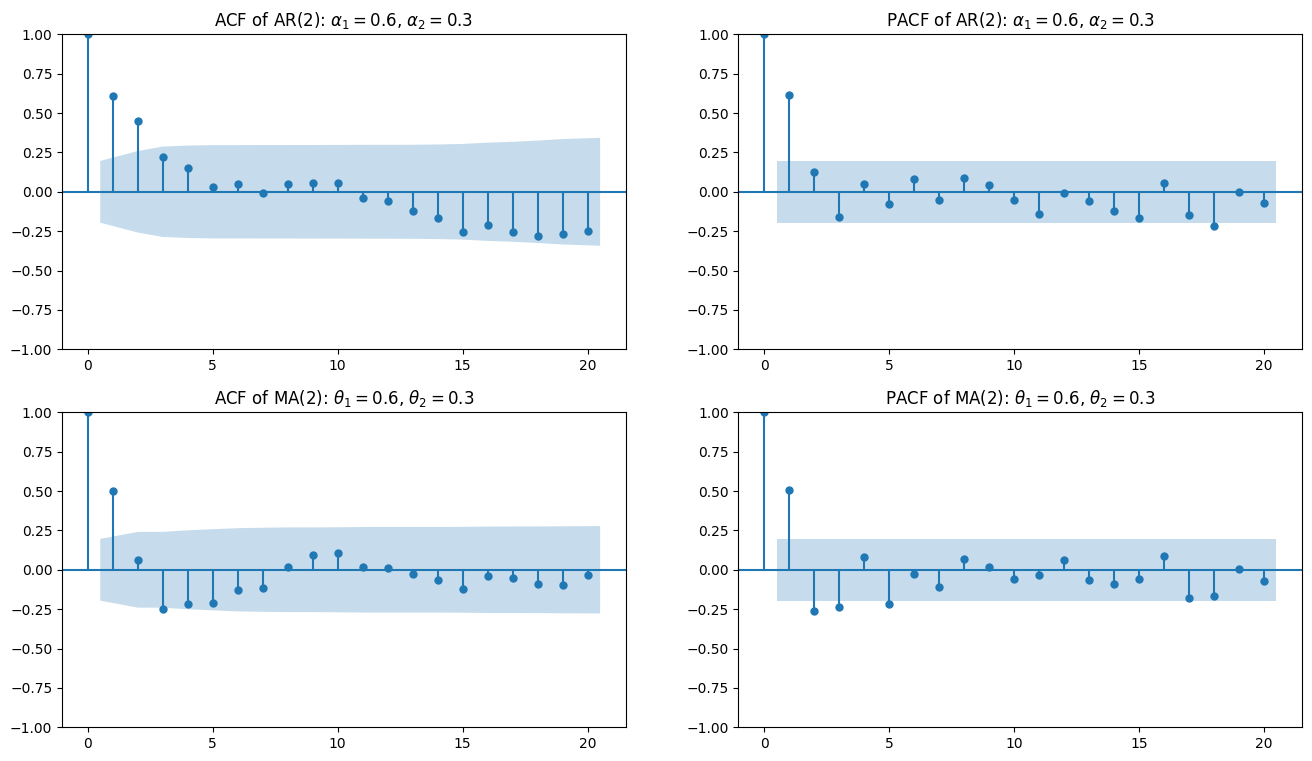

In [6]:
# ACF and PACF Plots for AR(2) and MA(2)

# MA(2) model
np.random.seed(77777)
arparams2 = np.r_[1, -np.array([0.0, 0.0])]
maparams2 = np.r_[1, np.array([0.6, 0.3])]
ma2 = arma_generate_sample(arparams2, maparams2, 100)


# ACF and PACF of AR(2)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
sm.graphics.tsa.plot_acf(
    ar2, title="ACF of AR(2): $\\alpha_1=0.6$, $\\alpha_2=0.3$", lags=20, ax=ax1
)
sm.graphics.tsa.plot_pacf(
    ar2, title="PACF of AR(2): $\\alpha_1=0.6$, $\\alpha_2=0.3$", lags=20, ax=ax2
)

# ACF and PACF of MA(2)
sm.graphics.tsa.plot_acf(
    ma2, title="ACF of MA(2): $\\theta_1=0.6$, $\\theta_2=0.3$", lags=20, ax=ax3
)
sm.graphics.tsa.plot_pacf(
    ma2, title="PACF of MA(2): $\\theta_1=0.6$, $\\theta_2=0.3$", lags=20, ax=ax4
)
plt.show()

In figure 4 above, the top two plots are ACF and PACF plots for an AR(2) process. The bottom two plots are ACF and PACF plots for an MA(2) process. In an ACF plot, the farthest left bar shows autocorrelation is $1$ when $h = 0$, which means it's the correlation for the observation itself. In the PACF plot, it starts with $h =1$, which means the farthest left bar is for PACF lag 1. 

For the AR(2) process, PACF plot shows a drop to almost $0$ after lag 2. For the MA(2) process, ACF plot shows a drop to almost $0$ after lag 2. This is a particularly important phenomenon. We can actually use this phenomenon to decide the model specification for a time series. If the PACF plot of a time series shows a sudden drop in value to close to $0$ after lag $p$, we can assume the time series follows an AR($p$) process. If the ACF plot of a time series shows a sudden drop in value to close to $0$ after lag $q$, we can assume this time series follows an MA($q$) process. With the above information, we can use ACF and PACF plots to decide which process and what lag to use to model a time series. Figure 5 summarizes what we just discussed about ACF and PACF plots.


**Figure 5: ACF and PACF Plot Features for AR($𝑝$) and MA($𝑞$)**

|           | ACF Plot Feature         | PACF Plot Feature          |
| :---:     | :---:                    | :---:                     |
| AR($ p $) | Tail off                 | Cut off after $ p $ lags  |
| MA($ q $) | Cut off after $ q $ lags | Tail off                  |


### **2.6 Estimation of AR Model**

We have introduced what an AR process model is. We discussed its property and how to select the number of lags $p$ for an AR($p$) model. Now we need to estimate the coefficients of the model. There are a few methods to estimate the model. We saw in section 1 that we can use ordinary least square (OLS) method to estimate the model. In this section, we will go over two other methods here: **method of moments** and **maximum likelihood method**.


#### **2.6.1. Method of Moments (MOM)**

Before talking about method of moments, let's briefly review what **moments** are. Moments are statistical parameters used to describe the distribution of a random variable. 

The most popular ones are mean and variance. Mean is the first order moment. Variance and covariance are the second order moments. Why do we refer to these moment parameters with order? It is because the functions of these parameters include the expected values of the order of random variable($E(X^{n})$). For example, the mean of $X$ is $E(X)$. The variance of $X$ can be written as $E(X^{2})-E(X)^{2}$. Hence, mean is the first order moment and variance is the second order moment for a random variable. Here is the list of popular moments we have used so far:

> - First Order Moment: Mean
> - Second Order Moments: Variance, covariance, correlation, autocovariance, autocorrelation
> - Third Order Moment: Skewness
> - Fourth Order Moment: Kurtosis

Now we know what a moment is. Next, we are going to explain what **method of moments** is. Method of moments is an estimation method that equates a sample moment to its theoretical counterpart and allows us to estimate the parameters for the model. Let's use a very simple example in AR(1) model to explain how it works.

Assume we have a time series $X_{t}$ and we have removed the trend and the seasonality. The time series is stationary. We have also run ACF and PACF and have decided AR(1) is a good model specification. We assume the mean of $X_{t}$ is $0$ so there is no constant in the AR(1) model. We can write our AR(1) model as follows:

$$ X_{t} = \alpha_{t} X_{t-1} + W_{t} $$

Where $W_{t}$ is normal white noise with mean = $0$ and variance = $\sigma^{2}$


From the time series $X_{t}$, we can calculate the following information:

> - Sample mean: $\overline{X}$
> - Sample variance: $\widehat{\gamma(0)}$
> - Sample autocovariance of lag 1: $\widehat{\gamma(1)}$


From last section, we know variance and autocovariance formulas are as follows:

The variance is:

$$ \frac{\sigma^{2}}{1-\alpha^{2}} $$

Autocovariance for $X_{t}$ and $ X_{s}$ is:

$$ \gamma(h) = (\frac{\sigma^{2}}{1-\alpha^{2}}) \alpha^{|h|} $$

where $|h| = |s – t| $

We can use the above sample information and formulas to solve for AR(1) parameter $\alpha$.

$$ \widehat{\alpha} = \frac{\widehat{\gamma(1)}}{\widehat{\gamma(0)}} $$



#### **2.6.2 Yule-Walker Estimators for AR Model**

We introduced MOM in the last section to estimate an AR(1) model. We can generalize the method we used in the last section to solve for a higher order AR($p$) model. The method we used above is a very simple case of Yule-Walker estimation. The **Yule-Walker estimation method** connects the coefficients of an AR($p$) model to the autocovariances of the time series by using a system of equations called **Yule-Walker equations**. 

When we have an AR($p$) process as follows:

$$ X_{t} = \alpha_{1} X_{t-1} + \alpha_{2} X_{t-2} + \cdots + \alpha_{p} X_{t-p} + W_{t} $$

Yule-Walker equations can be defined as follows:

$$ \begin{align*}
  \gamma(1)  &=  \alpha_{1}\gamma(0)+\alpha_{2}\gamma(-1)+\alpha_{3}\gamma(-2)+\cdots +\alpha_{p}\gamma(1-p) \\
  \gamma(2)  &=  \alpha_{1}\gamma(1)+\alpha_{2}\gamma(0)+\alpha_{3}\gamma(-1)+\cdots +\alpha_{p}\gamma(1-p+1) \\
  \gamma(3)  &=  \alpha_{1}\gamma(2)+\alpha_{2}\gamma(1)+\alpha_{3}\gamma(0)+\cdots +\alpha_{p}\gamma(1-p+2) \\
  &\ \ \vdots \\
  \gamma(p)  &=  \alpha_{1}\gamma(p-1)+\alpha_{2}\gamma(p-2)+\alpha_{3}\gamma(p-3)+\cdots+\alpha_{p}\gamma(0) \\
  \ \sigma^{2} \ \ &=  \gamma(0)-\alpha_{1}\gamma(1)-\alpha_{2}\gamma(2)-\cdots-\alpha_{p}\gamma(p)
\end{align*} $$

With the above $p+1$ Yule-Walker equation system, we can solve for $\{ \alpha_{1}, \alpha_{2}, \alpha_{3}, \cdots, \alpha_{p}, \sigma^{2} \}$ $\ p+1$ parameters. We can see the last equation in the Yule-Walker equation system is an equation to link the white noise variance to model coefficients and autocovariance. 

All statistical applications can calculate the estimated coefficients using Yule-Walker equations, so you do not need to calculate them manually.


#### **2.6.3 Maximum Likelihood Method (Box-Jenkins Method)**

The next estimation method we will introduce is the **maximum likelihood method (MLE)**. The maximum likelihood method is used to maximize the joint probability of the observed data points with respect to the model parameters. The joint probability is called a **likelihood function**. The likelihood function will usually take the log form so that the function will be easier to handle. Please read the required reading to learn the general definition and properties of the maximum likelihood estimation method. 

The maximum likelihood estimation method is the selected estimation method in the Box-Jenkins method. We will talk more about the Box-Jenkins method in the next lesson.

To apply the maximum likelihood method to an AR(1) model, we assume we have the following AR(1) model:

$$ X_{t} = \alpha_{t} X_{t-1} + W_{t} $$

Where $W_{t}$ is normal white noise with mean = $0$ and variance = $\sigma^{2}$ and $|\alpha| < 1$

With the above model, we can write our likelihood function as follows:

$$ L (\alpha,\sigma^{2}) = f(x_{1}, x_{2}, x_{3}, \cdots, x_{n} | \alpha, \sigma^{2}) $$

Where $x_{1}, x_{2}, x_{3}, \cdots, x_{n}$ are data points from the time series.

We then maximize $L(\alpha,\sigma^{2})$ with respect to $\alpha$ and $\sigma^{2}$ to solve for $\alpha$. All the statistical applications can solve the optimization for us.


#### **2.6.4 Comparison with Yule-Walker Estimators and Maximum Likelihood Estimators**

Now we know how Yule-Walker estimation and maximum likelihood estimation work for an AR model. However, what are the differences between the two methods? 

First, Yule-Walker estimation only uses information from first moments, second moments, etc., while the maximum likelihood method uses all data in the likelihood function. 

Secondly, when the sample size is larger, the coefficients from the Yule-Walker estimation will have larger variances than coefficients from the maximum likelihood method. 

Third, we can only apply the Yule-Walker method to AR models. However, you can apply MLE to most time series models.

However, MLE is computationally complicated while Yule-Walker estimation is relatively straight forward. The choice of estimation method will depend on the computer power and sample size of the data available.


## **3. Application of Autoregressive Models**

In this section, we will try to apply an AR model to simulated time series data. We've simulated an AR(2) time series for demonstration because we can do comparison of the actual parameters and estimated parameters. The analytical process is the same for real-world time series data as the simulated time series data. Figure 6 shows the simulated AR(2) time series plot and its actual parameters.


**Figure 6: Simulated AR(2) Time Series**


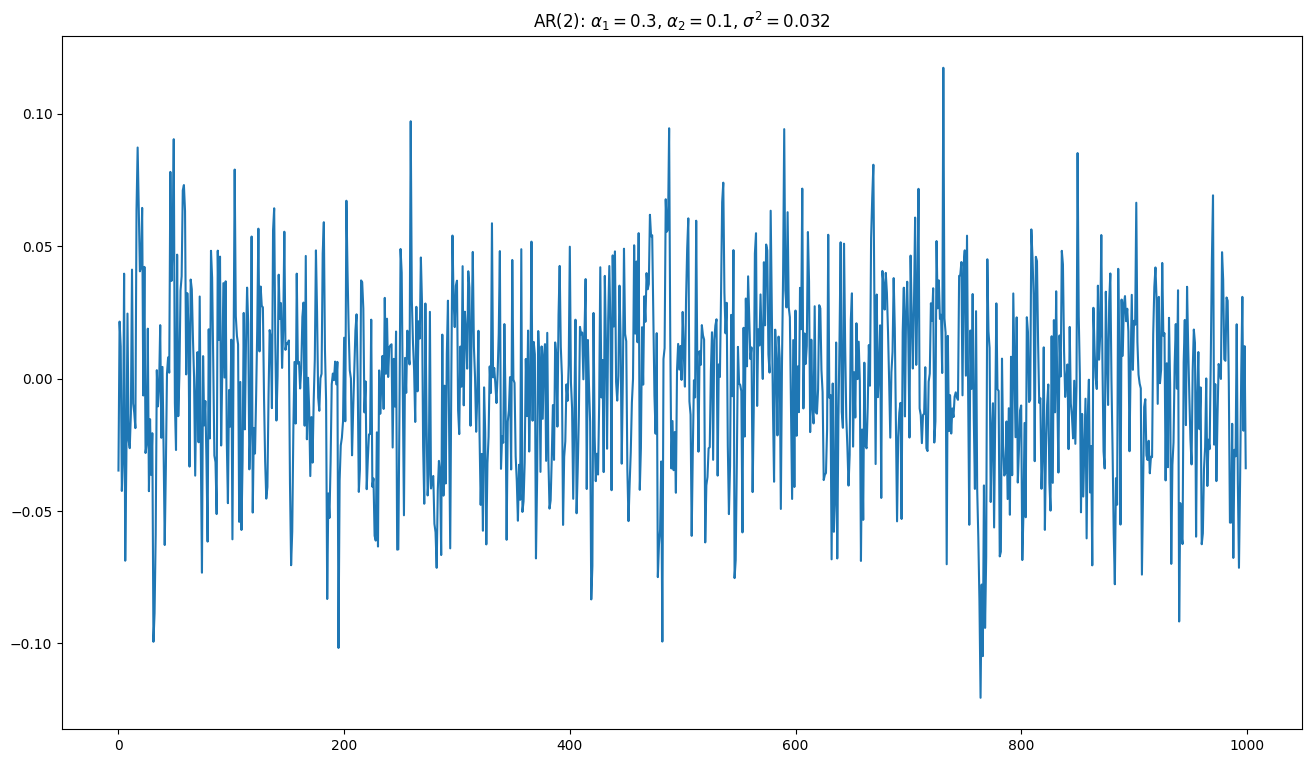

In [7]:
# Simulated AR(2) Time Series
np.random.seed(123)
nobs = 1000
arparams3 = np.r_[1, -np.array([0.3, 0.1])]
maparams3 = np.r_[1, np.array([0.0, 0.0])]
sim0 = arma_generate_sample(
    arparams3, maparams3, nobs, scale=0.032
)  # scale=standard deviation

# Plot AR(2)
plt.plot(sim0)
plt.title("AR(2): $\\alpha_1=0.3$, $\\alpha_2=0.1$, $\\sigma^2=0.032$")
plt.show()


We next draw ACF and PACF plots as figure 7.

**Figure 7: ACF and PACF Plots for Simulated AR(2) Time Series**


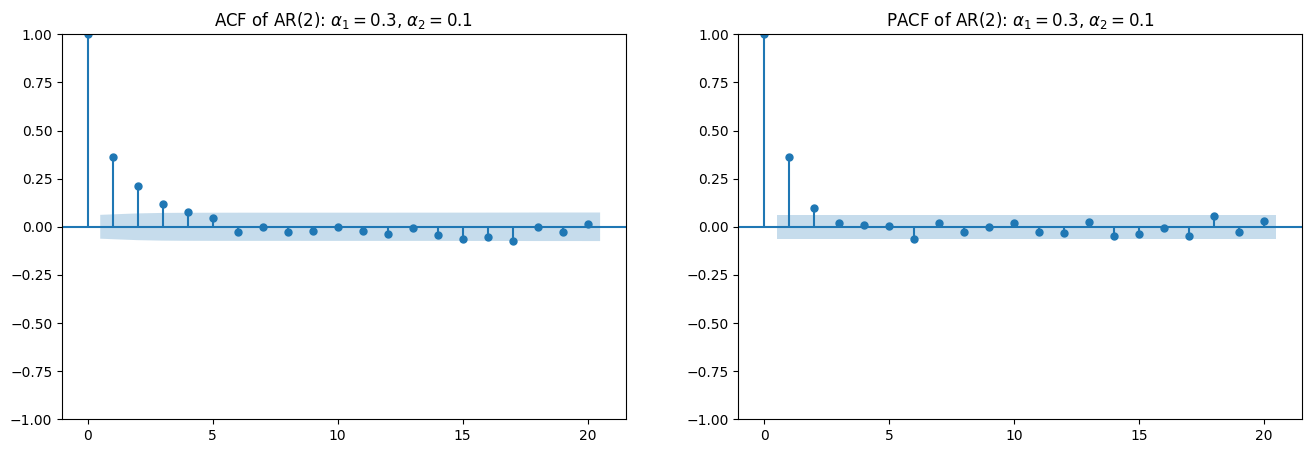

In [8]:
# ACF and PACF for Simulated AR(2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
sm.graphics.tsa.plot_acf(
    sim0, title="ACF of AR(2): $\\alpha_1=0.3$, $\\alpha_2=0.1$", lags=20, ax=ax1
)
sm.graphics.tsa.plot_pacf(
    sim0, title="PACF of AR(2): $\\alpha_1=0.3$, $\\alpha_2=0.1$", lags=20, ax=ax2
)
plt.show()

From figure 7, ACF decreases gradually while PACF drops suddenly. This indicates we should use the AR(2) model, which fits the actual time series process. 

Now, let's run an AR(2) time series model. Figure 8 shows the AR(2) model result.


**Figure 8: AR(2) Model Result**


In [9]:
# AR(2) Model Result
sim0_fit = ARIMA(sim0, order=(2, 0, 0), trend="n").fit()
print(sim0_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(2, 0, 0)   Log Likelihood                2021.897
Date:                Sun, 16 Mar 2025   AIC                          -4037.795
Time:                        19:26:21   BIC                          -4023.072
Sample:                             0   HQIC                         -4032.199
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3289      0.033      9.995      0.000       0.264       0.393
ar.L2          0.0966      0.033      2.960      0.003       0.033       0.161
sigma2         0.0010   4.62e-05     22.217      0.0

From figure 8, we can see both coefficient estimations are close to the actual values and their $p$-values are all significant. Now, let's check the residuals to see if the residuals follow normal white noise.


**Figure 9: Standardized Residuals from AR(2) Model**


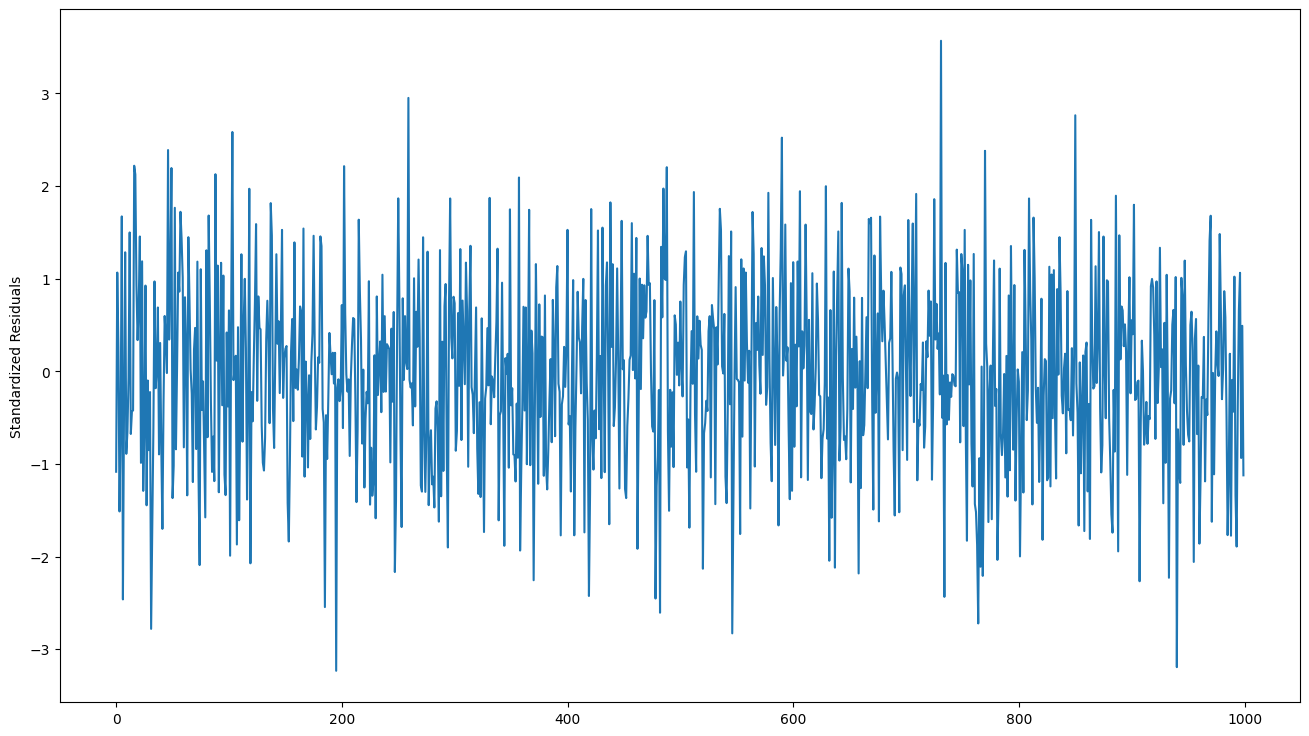

In [10]:
# Standardized Residuals from AR(2) Model
sim0_fit_res = sim0_fit.resid
sim0_fit_res_sta = sim0_fit_res / np.std(sim0_fit_res, ddof=1)
plt.plot(sim0_fit_res_sta)
plt.ylabel("Standardized Residuals")
plt.show()

From figure 9, we can see standardized residuals oscillate around $0$ and move within a flat channel. It indicates the residuals are stationary.

Now let's check the QQ plot for the normality of the residuals.


**Figure 10: QQ Plot for AR(2) Residuals**


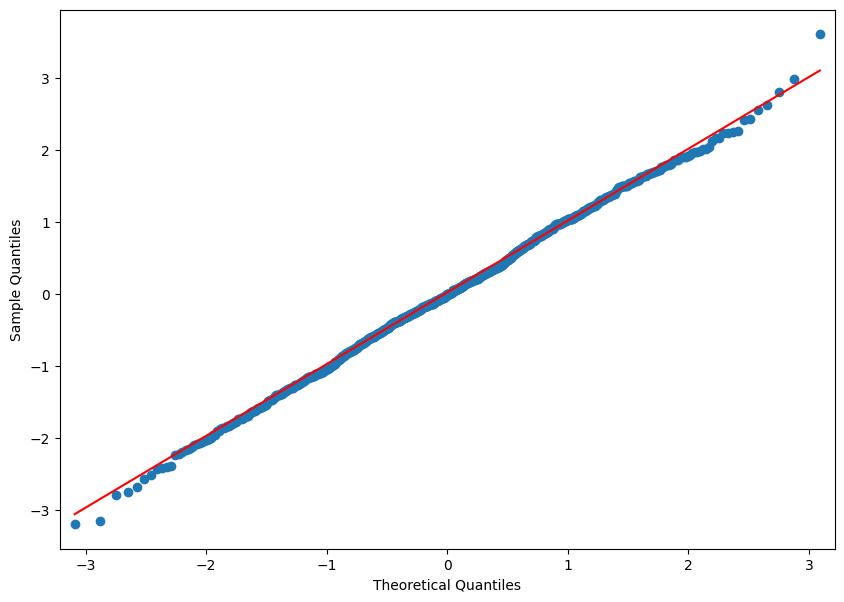

In [11]:
# QQ Plot for AR(2) Residuals
f = sm.qqplot(sim0_fit_res, line="q", fit=True)
f.set_size_inches(10, 7)
pylab.show()

From figure 10, we can see that residuals are normally distributed. Hence, we can confirm that the residuals are normal white noise. Lastly, let's draw a plot to show simulated time series vs. fitted time series.


**Figure 11: Simulated Time Series vs. Fitted Time Series**


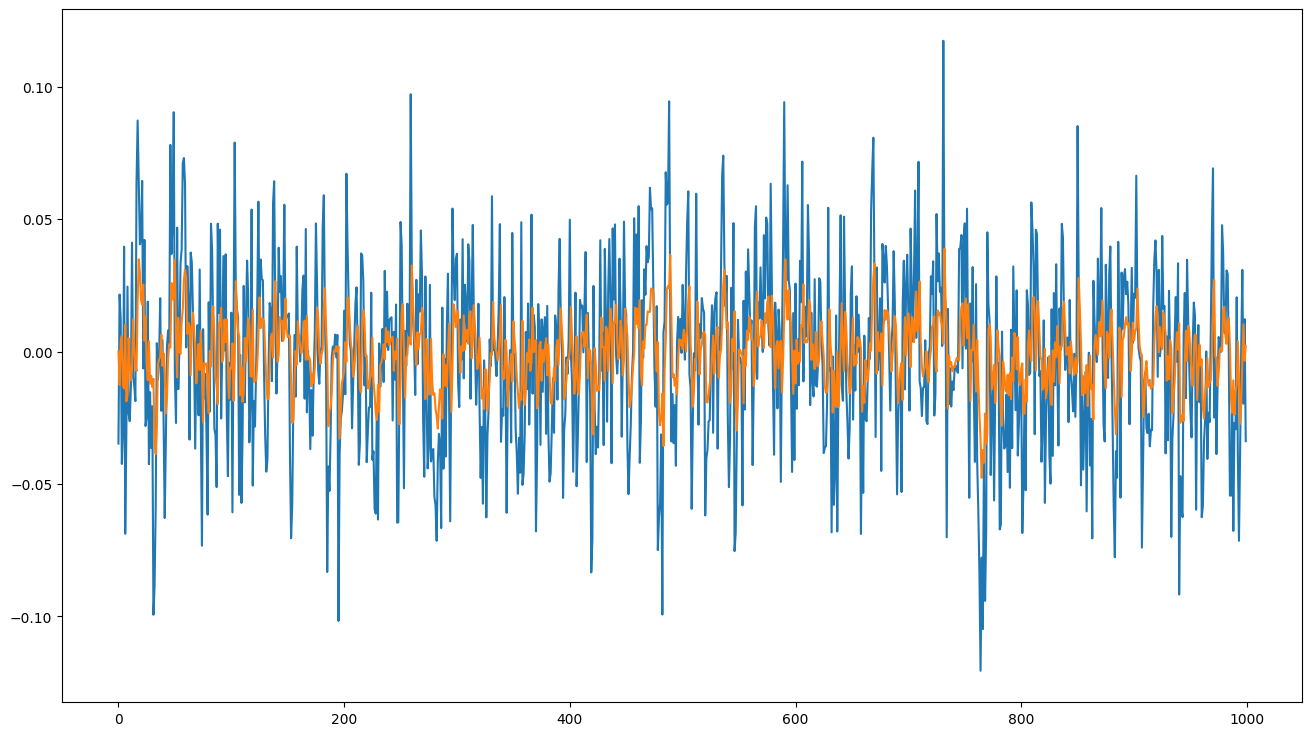

In [12]:
# Plot Time Series vs. Fitted Time Series

# TS plot
plt.plot(sim0)

# Fitted TS plot
sim0_ar2_fit = sim0 - sim0_fit_res
plt.plot(sim0_ar2_fit)
plt.show()

In figure 11, the black line is the simulated time series, and the orange line is the fitted time series. From the plot, we can see that the fitted line captures the general trend of the simulated time series but not the variation in the simulated time series. The differences are covered by the residuals.


## **4. Conclusion**

In this lesson, we went through the autoregressive model. We first give a brief description of what an AR model is. We then provided the formal definition of an AR model, provided some examples of AR processes, and gave the moments of an AR model. We then moved to discuss how to use ACF and PACF plots to identify an MA model or an AR model. We also explained why and when we can use an infinite AR process to represent an MA model. Then, we talked about two estimation methods for an AR model: the Yule-Walker method and maximum likelihood method. We ended the lesson with a simulated application to show how to model an AR model and conduct post model diagnostics. In the next lesson, we will introduce one comprehensive model and steps to run the model.


---
Copyright 2025 WorldQuant University. This
content is licensed solely for personal use. Redistribution or
publication of this material is strictly prohibited.
